<a href="https://colab.research.google.com/github/kzon94/hostame-simulator/blob/main/hostname-simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✅ Librerías instaladas correctamente.

✅ DataFrame creado con 1500 registros.

Vista previa del DataFrame:

   hostname       os  environment  country  node
0  SIIRL001  Solaris  Integration  Ireland     1
1  LDESP001    Linux  Development    Spain     1
2  SPESP001  Solaris   Production    Spain     1
3  STDEU001  Solaris      Testing  Germany     1
4  SSIRL001  Solaris      Staging  Ireland     1

✅ Archivo 'hosts.csv' guardado correctamente.



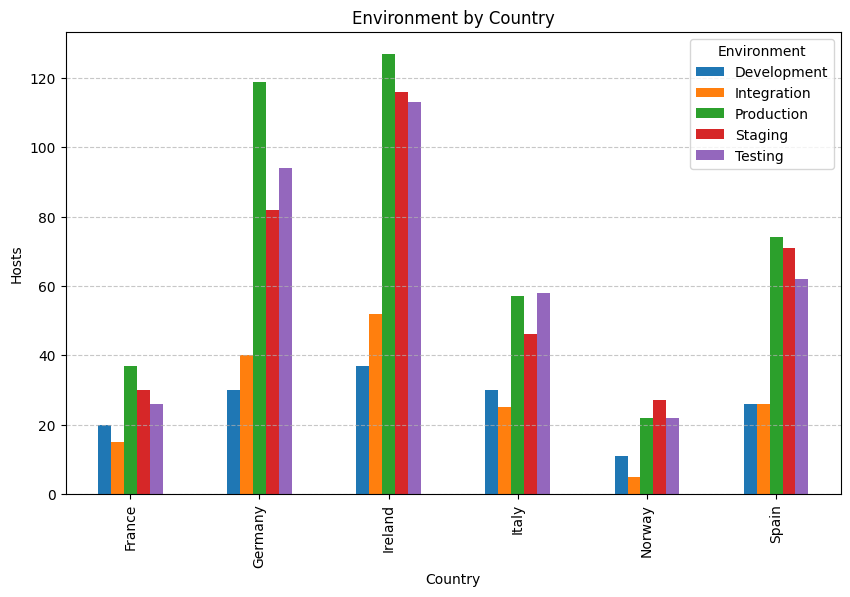


✅ Gráfico 'Environment by Country' completado.



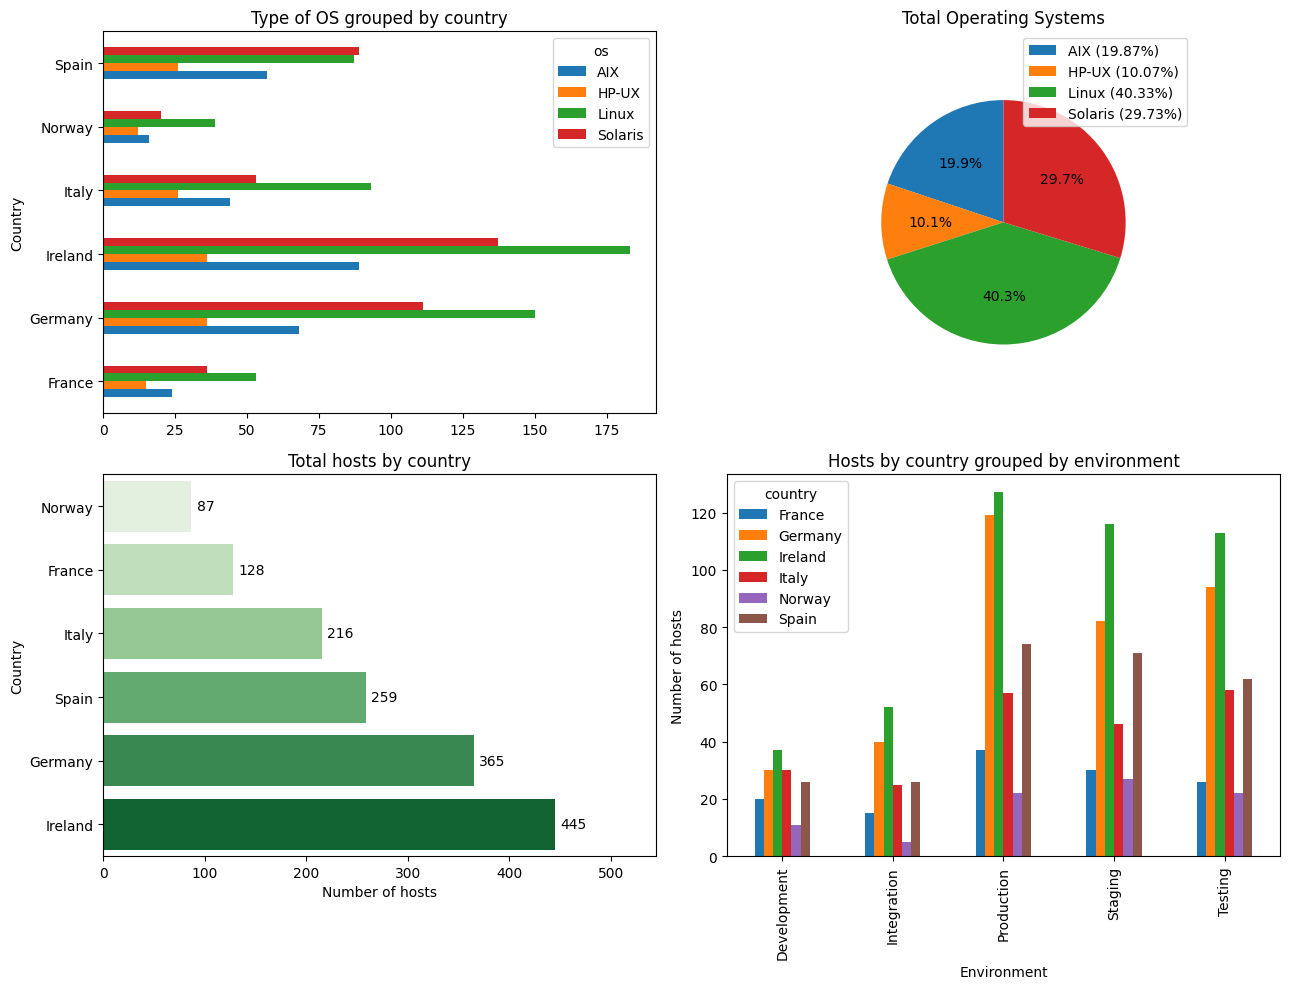


✅ Panel de gráficos 2x2 completado.



In [7]:
# Instalar librerías necesarias (ejecuta solo la primera vez)
!pip install pandas numpy matplotlib seaborn
print("\n✅ Librerías instaladas correctamente.\n")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Inicialización de variables globales
df = None
dataset = []
counter_dict = {}

# Funciones auxiliares para extraer atributos del hostname
def get_os(hostname):
    os_dict = {
        'L': 'Linux',
        'S': 'Solaris',
        'A': 'AIX',
        'H': 'HP-UX'
    }
    return os_dict.get(hostname[0], 'Unknown')

def get_environment(hostname):
    env_dict = {
        'D': 'Development',
        'I': 'Integration',
        'T': 'Testing',
        'S': 'Staging',
        'P': 'Production'
    }
    return env_dict.get(hostname[1], 'Unknown')

def get_country(hostname):
    country_dict = {
        'NOR': 'Norway',
        'FRA': 'France',
        'ITA': 'Italy',
        'ESP': 'Spain',
        'DEU': 'Germany',
        'IRL': 'Ireland'
    }
    return country_dict.get(hostname[2:5], 'Unknown')

# Generador de hostnames
def set_hostnames(number_of_hosts):
    global dataset, counter_dict
    # Opciones y probabilidades para cada atributo
    os_choices      = ['L', 'S', 'A', 'H']
    os_probs        = [0.4, 0.3, 0.2, 0.1]
    env_choices     = ['D', 'I', 'T', 'S', 'P']
    env_probs       = [0.1, 0.1, 0.25, 0.25, 0.3]
    country_choices = ['NOR', 'FRA', 'ITA', 'ESP', 'DEU', 'IRL']
    country_probs   = [0.06, 0.09, 0.16, 0.16, 0.23, 0.30]

    for _ in range(number_of_hosts):
        os_letter    = random.choices(os_choices, weights=os_probs, k=1)[0]
        env_letter   = random.choices(env_choices, weights=env_probs, k=1)[0]
        country_code = random.choices(country_choices, weights=country_probs, k=1)[0]

        key = f"{os_letter}{env_letter}{country_code}"
        counter_dict[key] = counter_dict.get(key, 0) + 1
        node_number = str(counter_dict[key]).zfill(3)
        hostname = f"{os_letter}{env_letter}{country_code}{node_number}"

        dataset.append({
            "hostname": hostname,
            "os": get_os(hostname),
            "environment": get_environment(hostname),
            "country": get_country(hostname),
            "node": int(node_number)
        })

# Funciones de creación y guardado del DataFrame
def set_dataframe(count):
    global df, dataset, counter_dict
    # Reiniciar datos en cada ejecución
    dataset.clear()
    counter_dict.clear()
    set_hostnames(count)
    df = pd.DataFrame(dataset)
    print("✅ DataFrame creado con {} registros.".format(len(df)))
    print("\nVista previa del DataFrame:\n")
    print(df.head())

def save_dataframe():
    if df is not None and not df.empty:
        df.to_csv("hosts.csv", index=False, header=True)
        print("\n✅ Archivo 'hosts.csv' guardado correctamente.\n")
    else:
        print("\n⚠️ Error: No hay datos en el DataFrame.\n")

# Función para graficar entornos por país
def plot_environment_by_country():
    if df is None or df.empty:
        print("\n⚠️ Error: No hay datos en el DataFrame.")
        return
    title = "Environment by Country"
    env_country_df = df.groupby(["country", "environment"]).size().unstack(fill_value=0)
    ax = env_country_df.plot(kind="bar", figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Country")
    plt.ylabel("Hosts")
    plt.legend(title="Environment")
    plt.xticks(rotation=90)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    print("\n✅ Gráfico 'Environment by Country' completado.\n")


# Función para generar un panel de 4 gráficos (2x2)
def plot_full_analysis():
    if df is None or df.empty:
        print("\n⚠️ Error: No hay datos en el DataFrame.")
        return

    fig, axes = plt.subplots(2, 2, figsize=(13, 10))

    # Gráfico 1: Barras horizontales - Sistemas operativos por país
    ax1 = axes[0, 0]
    os_country_df = df.groupby(["country", "os"]).size().unstack(fill_value=0)
    os_country_df.plot(kind="barh", ax=ax1)
    title1 = "Type of OS grouped by country"
    ax1.set_title(title1)
    ax1.set_xlabel("")
    ax1.set_ylabel("Country")

    # Gráfico 2: Tarta - Distribución de sistemas operativos
    ax2 = axes[0, 1]
    os_counts = df.groupby("os").size()
    total_hosts = os_counts.sum()
    labels = os_counts.index.tolist()
    percentages = (os_counts / total_hosts) * 100
    wedges, texts, autotexts = ax2.pie(
        os_counts,
        labels=None,
        autopct=lambda pct: f"{pct:.1f}%",
        startangle=90,
        radius=0.8
    )
    legend_labels = [f"{os} ({p:.2f}%)" for os, p in zip(labels, percentages)]
    ax2.legend(wedges, legend_labels, title="", loc="upper right", fontsize=10)
    title2 = "Total Operating Systems"
    ax2.set_title(title2)

    # Gráfico 3: Barras horizontales con gradiente - Hosts totales por país
    ax3 = axes[1, 0]
    country_counts = df["country"].value_counts().sort_values().reset_index()
    country_counts.columns = ['country', 'counts']
    max_hosts = country_counts['counts'].max() + 100
    sns.barplot(
        x="counts",
        y="country",
        hue="country",
        data=country_counts,
        palette="Greens",
        dodge=False,
        legend=False,
        ax=ax3
    )
    title3 = "Total hosts by country"
    ax3.set_title(title3)
    ax3.set_xlabel("Number of hosts")
    ax3.set_ylabel("Country")
    ax3.set_xlim(0, max_hosts)
    for i, v in enumerate(country_counts['counts']):
        ax3.text(v + 5, i, str(v), va='center', fontsize=10)

    # Gráfico 4: Barras agrupadas - Hosts por país agrupados por entorno
    ax4 = axes[1, 1]
    env_country_df = df.groupby(["environment", "country"]).size().unstack(fill_value=0)
    env_country_df.plot(kind="bar", ax=ax4)
    title4 = "Hosts by country grouped by environment"
    ax4.set_title(title4)
    ax4.set_xlabel("Environment")
    ax4.set_ylabel("Number of hosts")

    plt.tight_layout()
    plt.show()
    print("\n✅ Panel de gráficos 2x2 completado.\n")

# Ejecución de procesos en orden
set_dataframe(1500)
save_dataframe()
plot_environment_by_country()
plot_full_analysis()